In [1]:
import os
import sys

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
# Get the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add the parent directory to sys.path
sys.path.append(f"{parent_dir}\\UsedSourceCodes\\wishbone_folder\\wishbone\\src")
sys.path.append(f"{parent_dir}")

In [4]:
import wishbone

here


In [5]:
parent_parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))
print(parent_parent_dir)
sys.path.append(f"{parent_parent_dir}")

C:\Users\rajim\Desktop\PHDcodes


In [6]:
path = f"{parent_parent_dir}/data/experiment_UMvsM"
list_files = os.listdir(path)

n1 = 6
new1 = list_files[n1]
print(new1)
new1 = path+"/" + new1
scdata1 = wishbone.wb.SCData.from_fcs(os.path.expanduser(new1),
            cofactor= 5)

1st ag3650_M.fcs


C:\Users\rajim\AppData\Local\anaconda3\Lib\site-packages\fcsparser\api.py:326: UserWarning: The first two characters were:
 \$. The last two characters were: \ 
Parser expects the same delimiter character in beginning and end of TEXT segment. This file may be parsed incorrectly!
  warnings.warn(msg)


In [7]:
columnstouse = ['141Pr_CD196', '142Nd_CD19', '143Nd_CD5', '144Nd_CD38', '145Nd',
       '146Nd_IgD', '147Sm_CD11c', '148Nd_CD16', '149Sm_CCR4', '150Nd_CD43',
       '151Eu_CD69', '152Sm_CD21', '153Eu_CXCR5', '154Sm_CD62L',
       '155Gd_CD45RA', '158Gd_CD27', '159Tb_CD22', '160Gd_CD14', '162Dy',
       '163Dy_CXCR3', '164Dy_CD23', '165Ho_CD45_BC', '166Er_CD24',
       '167Er_CCR7', '168Er_CD8a', '169Tm_CD45_BC', '170Er_CD3', '171Yb_CD20',
       '172Yb_IgM', '173Yb_HLA-DR', '174Yb_CD49d', '175Lu_CXCR4', '176Yb_CD56']

In [8]:
scdata1.data = scdata1.data[columnstouse]

In [9]:
rename_map = {
    'CD196': 'CD196', 'CD19': 'CD19', 'CD5': 'CD5', 'CD38': 'CD38', 'IgD': 'IgD', 'CD11c': 'CD11c',
    'CD43': 'CD43', 'CD69': 'CD69', 'CD21': 'CD21', 'CXCR5': 'CXCR5', 'CD62L': 'CD62L', 'CD27': 'CD27',
    'CD22': 'CD22', 'CXCR3': 'CXCR3', 'CD23': 'CD23', 'CD24': 'CD24', 'CCR7': 'CCR7', 'CD20': 'CD20',
    'IgM': 'IgM', 'HLA-DR': 'HLA-DR', 'CD49d': 'CD49d', 'CXCR4': 'CXCR4'
}

# Extract relevant columns and rename them
selected_cols = {col: rename_map[col.split('_')[-1]] for col in scdata1.data.columns if col.split('_')[-1] in rename_map}


In [10]:
scdata1.data = scdata1.data[list(selected_cols.keys())].rename(columns=selected_cols)

In [11]:
scdata1.data = scdata1.data.sample(n=1000, random_state=42).reset_index(drop = True)

In [12]:
scdata1.data.head()

,CD196,CD19,CD5,CD38,IgD,CD11c,CD43,CD69,CD21,CXCR5,...,CD22,CXCR3,CD23,CD24,CCR7,CD20,IgM,HLA-DR,CD49d,CXCR4
0,0.028665,3.454731,3.027428,4.617972,0.209751,0.080369,2.763631,0.038635,2.248824,3.945504,...,0.732403,4.025700,0.000000,3.809471,3.953341,1.424128,0.000000,2.564345,0.447250,2.751077
1,1.417846,4.986762,1.230961,0.000000,0.457540,0.464010,0.510157,0.000000,0.820299,4.076923,...,1.106283,4.569804,1.156695,2.945383,4.651578,4.164415,0.000000,3.232945,0.553155,4.347816
2,1.037249,4.168495,1.725446,3.434825,0.040005,0.000000,2.612094,0.012425,1.033035,4.121088,...,0.192261,3.621416,0.712028,2.874356,4.298021,3.357377,0.874201,2.757579,0.230391,3.821332
3,1.512680,4.825484,2.790965,0.139342,0.650991,0.834186,2.464176,3.045780,2.947046,4.376920,...,2.665307,5.108264,2.349006,2.438353,4.320769,3.220575,2.346239,5.087028,0.973028,0.845473
4,2.208673,4.937995,1.742946,2.709136,0.833644,1.123641,3.107138,0.000000,2.874178,4.588623,...,2.108946,4.046031,3.760137,3.165076,4.137021,3.556318,1.891071,4.350518,0.000000,1.790404


In [13]:
scdata1.run_tsne()

In [15]:
%matplotlib inline
fig, ax = scdata1.plot_tsne()

In [14]:
plt.show()

In [16]:
fig, ax = scdata1.plot_gene_expression(['CCR7', 'CD19', 'CD5', 'CXCR4'])

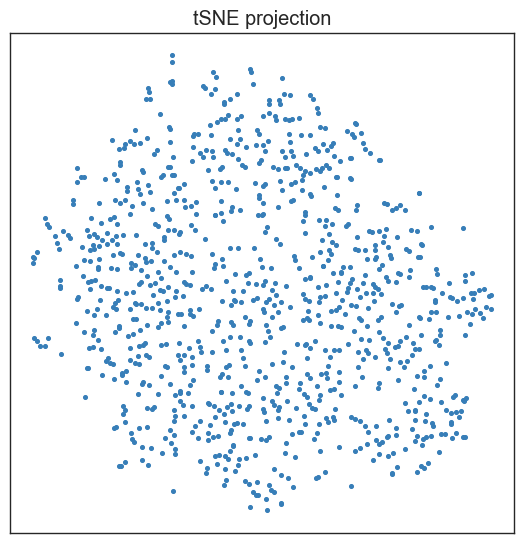

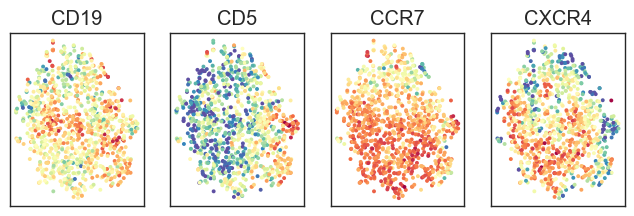

In [17]:
plt.show()

In [18]:
# Run diffusion maps
scdata1.run_diffusion_map()

In [19]:
fig, ax = scdata1.plot_diffusion_components()

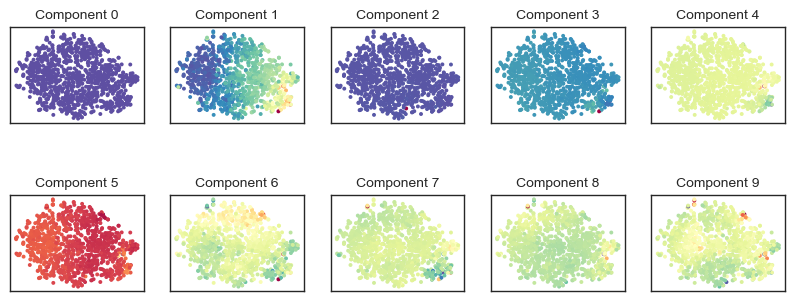

In [20]:
plt.show()

In [21]:
start_cell = scdata1.data.index[(scdata1.data['CXCR4'] > 3) & (scdata1.data['CD19'] > 3)][0]
# Waypoints
# waypoints = pd.DataFrame.from_csv(os.path.expanduser('~/.wishbone/data/masscyt_waypoints.csv')).iloc[:, 0]
# waypoints = list(waypoints)

In [22]:
# Wishbone class
wb = wishbone.wb.Wishbone(scdata1)
wb.run_wishbone(start_cell, components_list=[1, 2, 3], num_waypoints=list(scdata1.data.index))

Building lNN graph...
lNN computed in : 0.02 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

C:\Users\rajim\Desktop\PHDcodes\MyPhDCodes\UsedSourceCodes\wishbone_folder\wishbone\src\wishbone\core.py:408: RuntimeWarning: invalid value encountered in divide
  Stoch = np.divide(Aff, np.sum(Aff, axis=0))


Running iterations...
Iteration: 2
Correlation with previous iteration:  0.9999
1 realignment iterations


In [50]:
vals, fig, ax = wb.plot_marker_trajectory(['CXCR4', 'CD5'], 
                    smoothing_factor=1.5, show_variance=True);

C:\Users\rajim\Desktop\PHDcodes\MyPhDCodes\UsedSourceCodes\wishbone_folder\wishbone\src\wishbone\wb.py:1268: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = trunk_vals.append( branch_vals[0] ).append( branch_vals[1] )
C:\Users\rajim\Desktop\PHDcodes\MyPhDCodes\UsedSourceCodes\wishbone_folder\wishbone\src\wishbone\wb.py:1268: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = trunk_vals.append( branch_vals[0] ).append( branch_vals[1] )
C:\Users\rajim\Desktop\PHDcodes\MyPhDCodes\UsedSourceCodes\wishbone_folder\wishbone\src\wishbone\wb.py:1268: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = trunk_vals.append( branch_vals[0] ).append( branch_vals[1] )
C:\Users\rajim\Desktop\PHDcodes\MyPhDCodes\UsedSourceCodes\wi

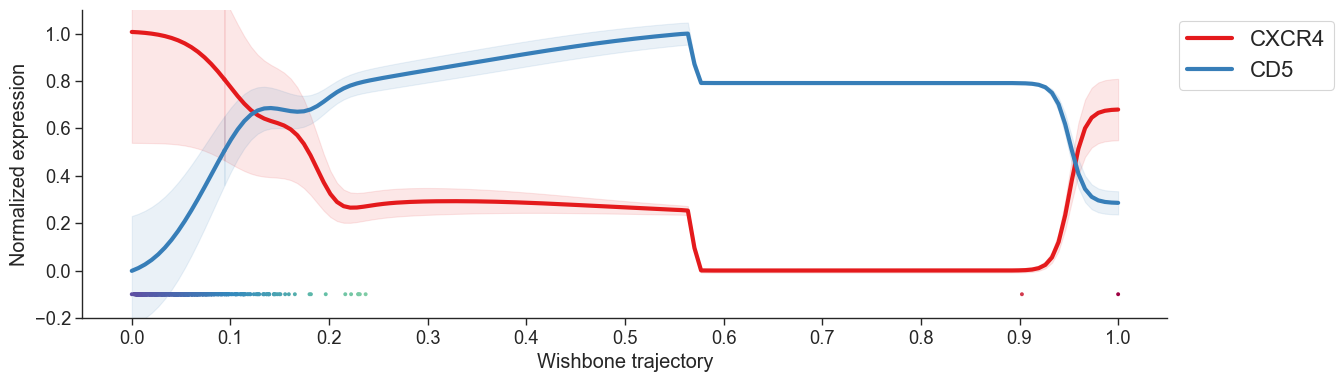

In [52]:
plt.show()